In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the data
df = pd.read_csv('forestfires.csv')


df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 44.6 KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


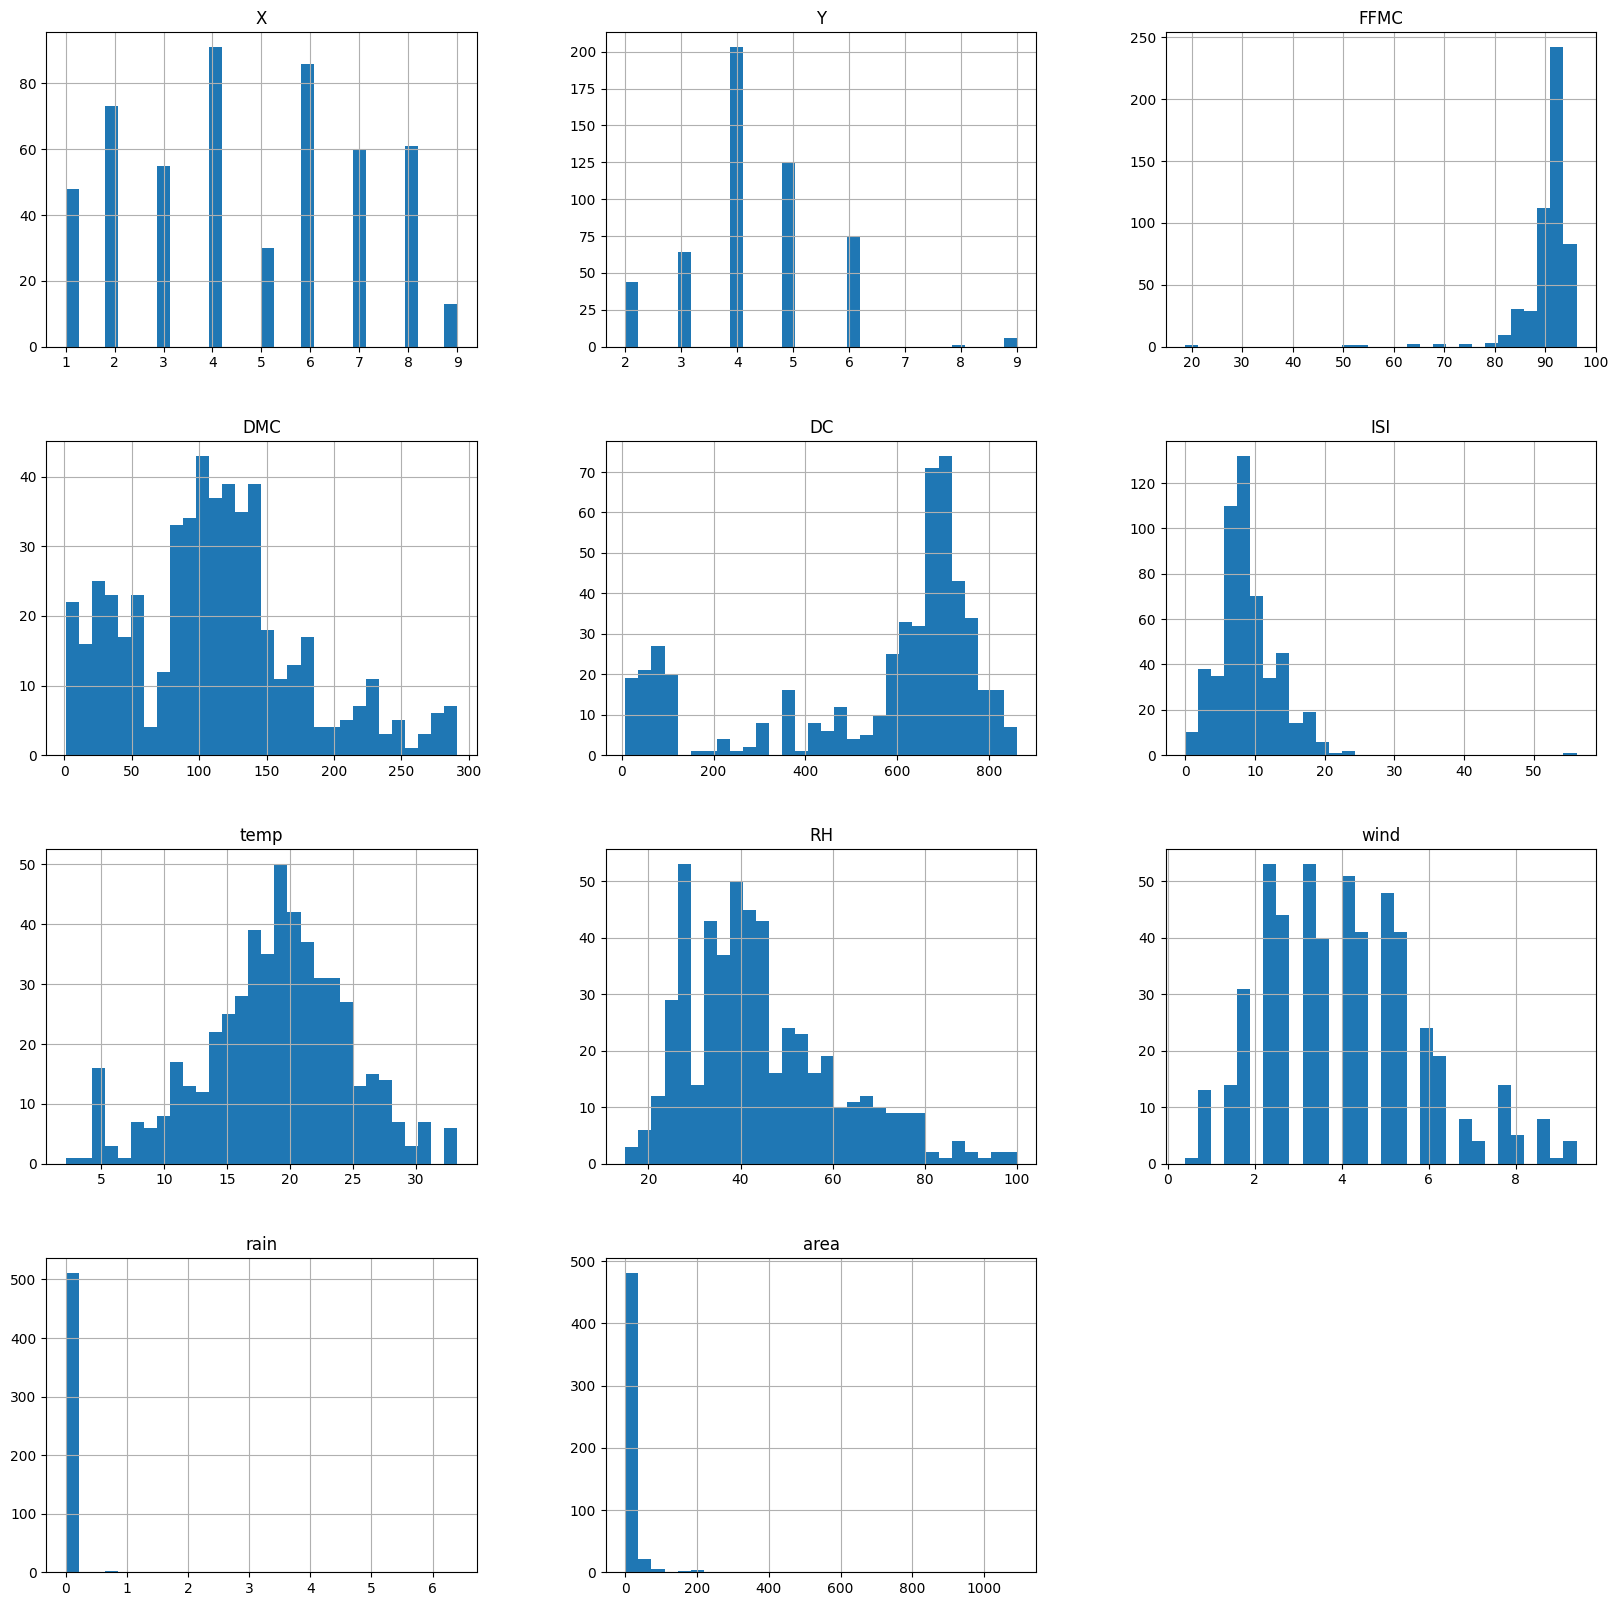

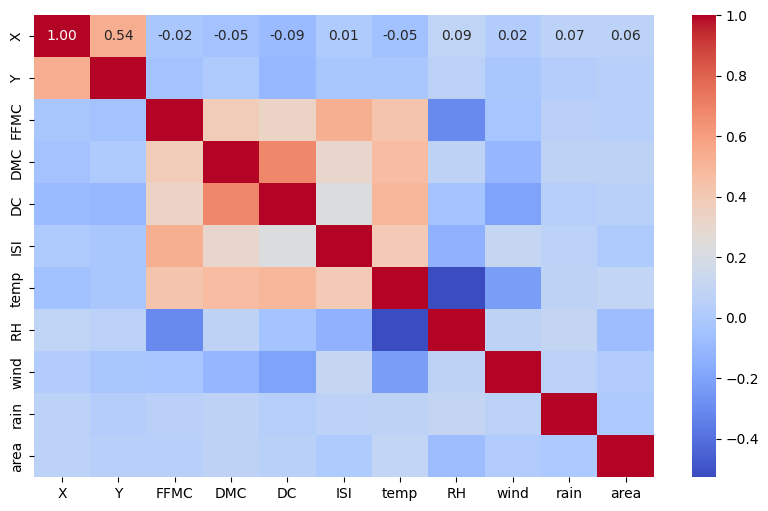

In [3]:
#check for distributions using histograms and plots
df.hist(figsize=(20,20), bins=30)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Range Normalization

In [4]:
def range_normalization(df_inicial):
    range = df_inicial.max() - df_inicial.min()
    mean = df_inicial.mean()
    return (df_inicial - mean) / range

df_range = df.apply(range_normalization, axis=0)

print(df_range)

            X         Y      FFMC       DMC        DC       ISI      temp  \
0    0.291344  0.100028 -0.057351 -0.291772 -0.532004 -0.069905 -0.343703   
1    0.291344 -0.042830 -0.000577 -0.260070  0.142090 -0.041384 -0.028591   
2    0.291344 -0.042830 -0.000577 -0.231469  0.162965 -0.041384 -0.137915   
3    0.416344  0.242885  0.013617 -0.267306 -0.551706 -0.000386 -0.340488   
4    0.416344  0.242885 -0.017351 -0.205280 -0.522740  0.010309 -0.240809   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.083656 -0.185687 -0.116706 -0.186672  0.137985 -0.126946  0.286522   
513 -0.333656 -0.042830 -0.116706 -0.186672  0.137985 -0.126946  0.096811   
514  0.291344 -0.042830 -0.116706 -0.186672  0.137985 -0.126946  0.074303   
515 -0.458656 -0.042830  0.048456  0.121046  0.078292  0.040612  0.215782   
516  0.166344 -0.185687 -0.143802 -0.371717 -0.517462 -0.141206 -0.227948   

           RH      wind      rain      area  
0    0.078962  0.298044 -0.00

# Z-score Normalization

In [5]:
def z_score_normalization(df_inicial):
    std_dev = df_inicial.std()
    mean = df_inicial.mean()
    return (df_inicial - mean) / std_dev

df_z_score = df.apply(z_score_normalization, axis=0)

print(df_z_score)

            X         Y      FFMC       DMC        DC       ISI      temp  \
0    1.007337  0.569309 -0.805180 -1.322045 -1.828706 -0.860113 -1.840857   
1    1.007337 -0.243765 -0.008094 -1.178399  0.488418 -0.509195 -0.153130   
2    1.007337 -0.243765 -0.008094 -1.048806  0.560173 -0.509195 -0.738668   
3    1.439531  1.382383  0.191177 -1.211188 -1.896429 -0.004751 -1.823636   
4    1.439531  1.382383 -0.243597 -0.930142 -1.796859  0.126843 -1.289763   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289244 -1.056839 -1.638496 -0.845829  0.474309 -1.561947  1.534597   
513 -1.153631 -0.243765 -1.638496 -0.845829  0.474309 -1.561947  0.518517   
514  1.007337 -0.243765 -1.638496 -0.845829  0.474309 -1.561947  0.397965   
515 -1.585825 -0.243765  0.680298  0.548471  0.269122  0.499693  1.155720   
516  0.575144 -1.056839 -2.018923 -1.684282 -1.778719 -1.737406 -1.220876   

           RH      wind      rain      area  
0    0.411326  1.497164 -0.07

In [6]:
df.head(500)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
495,6,6,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,0.00
496,4,5,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,2.77
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
498,6,5,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54


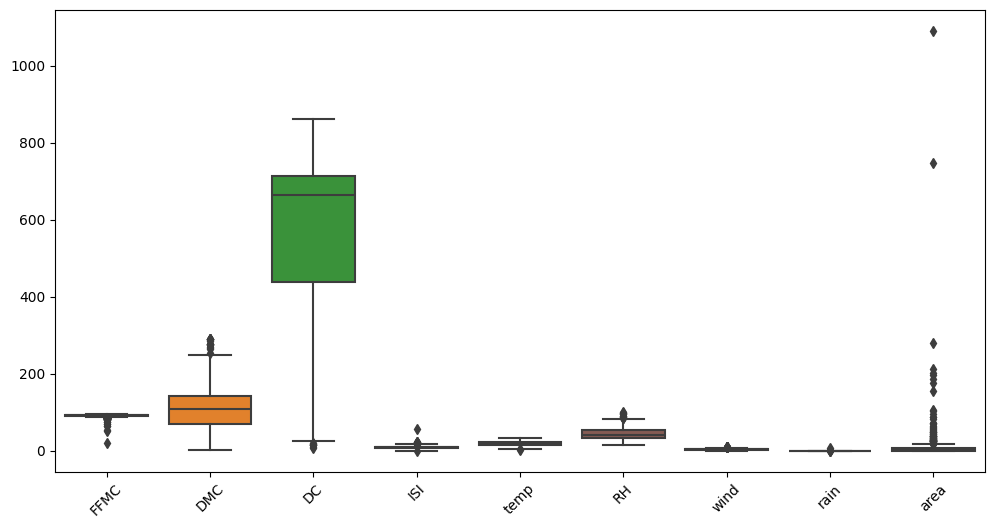

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
plt.xticks(rotation=45)
plt.show()

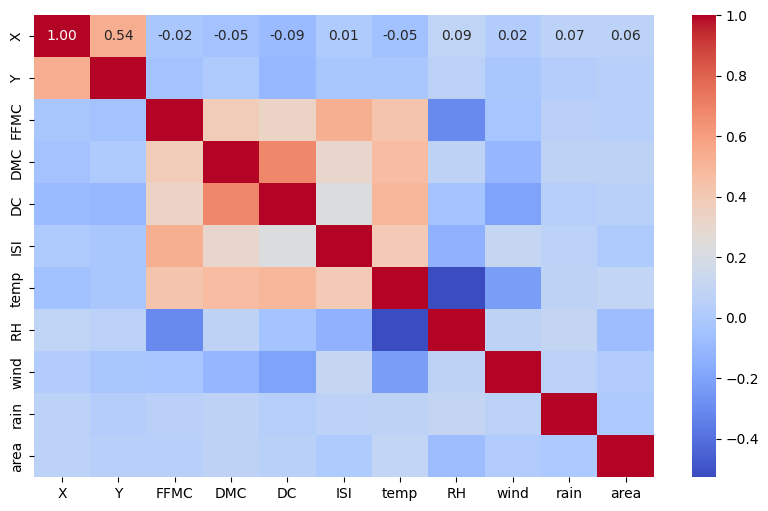

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

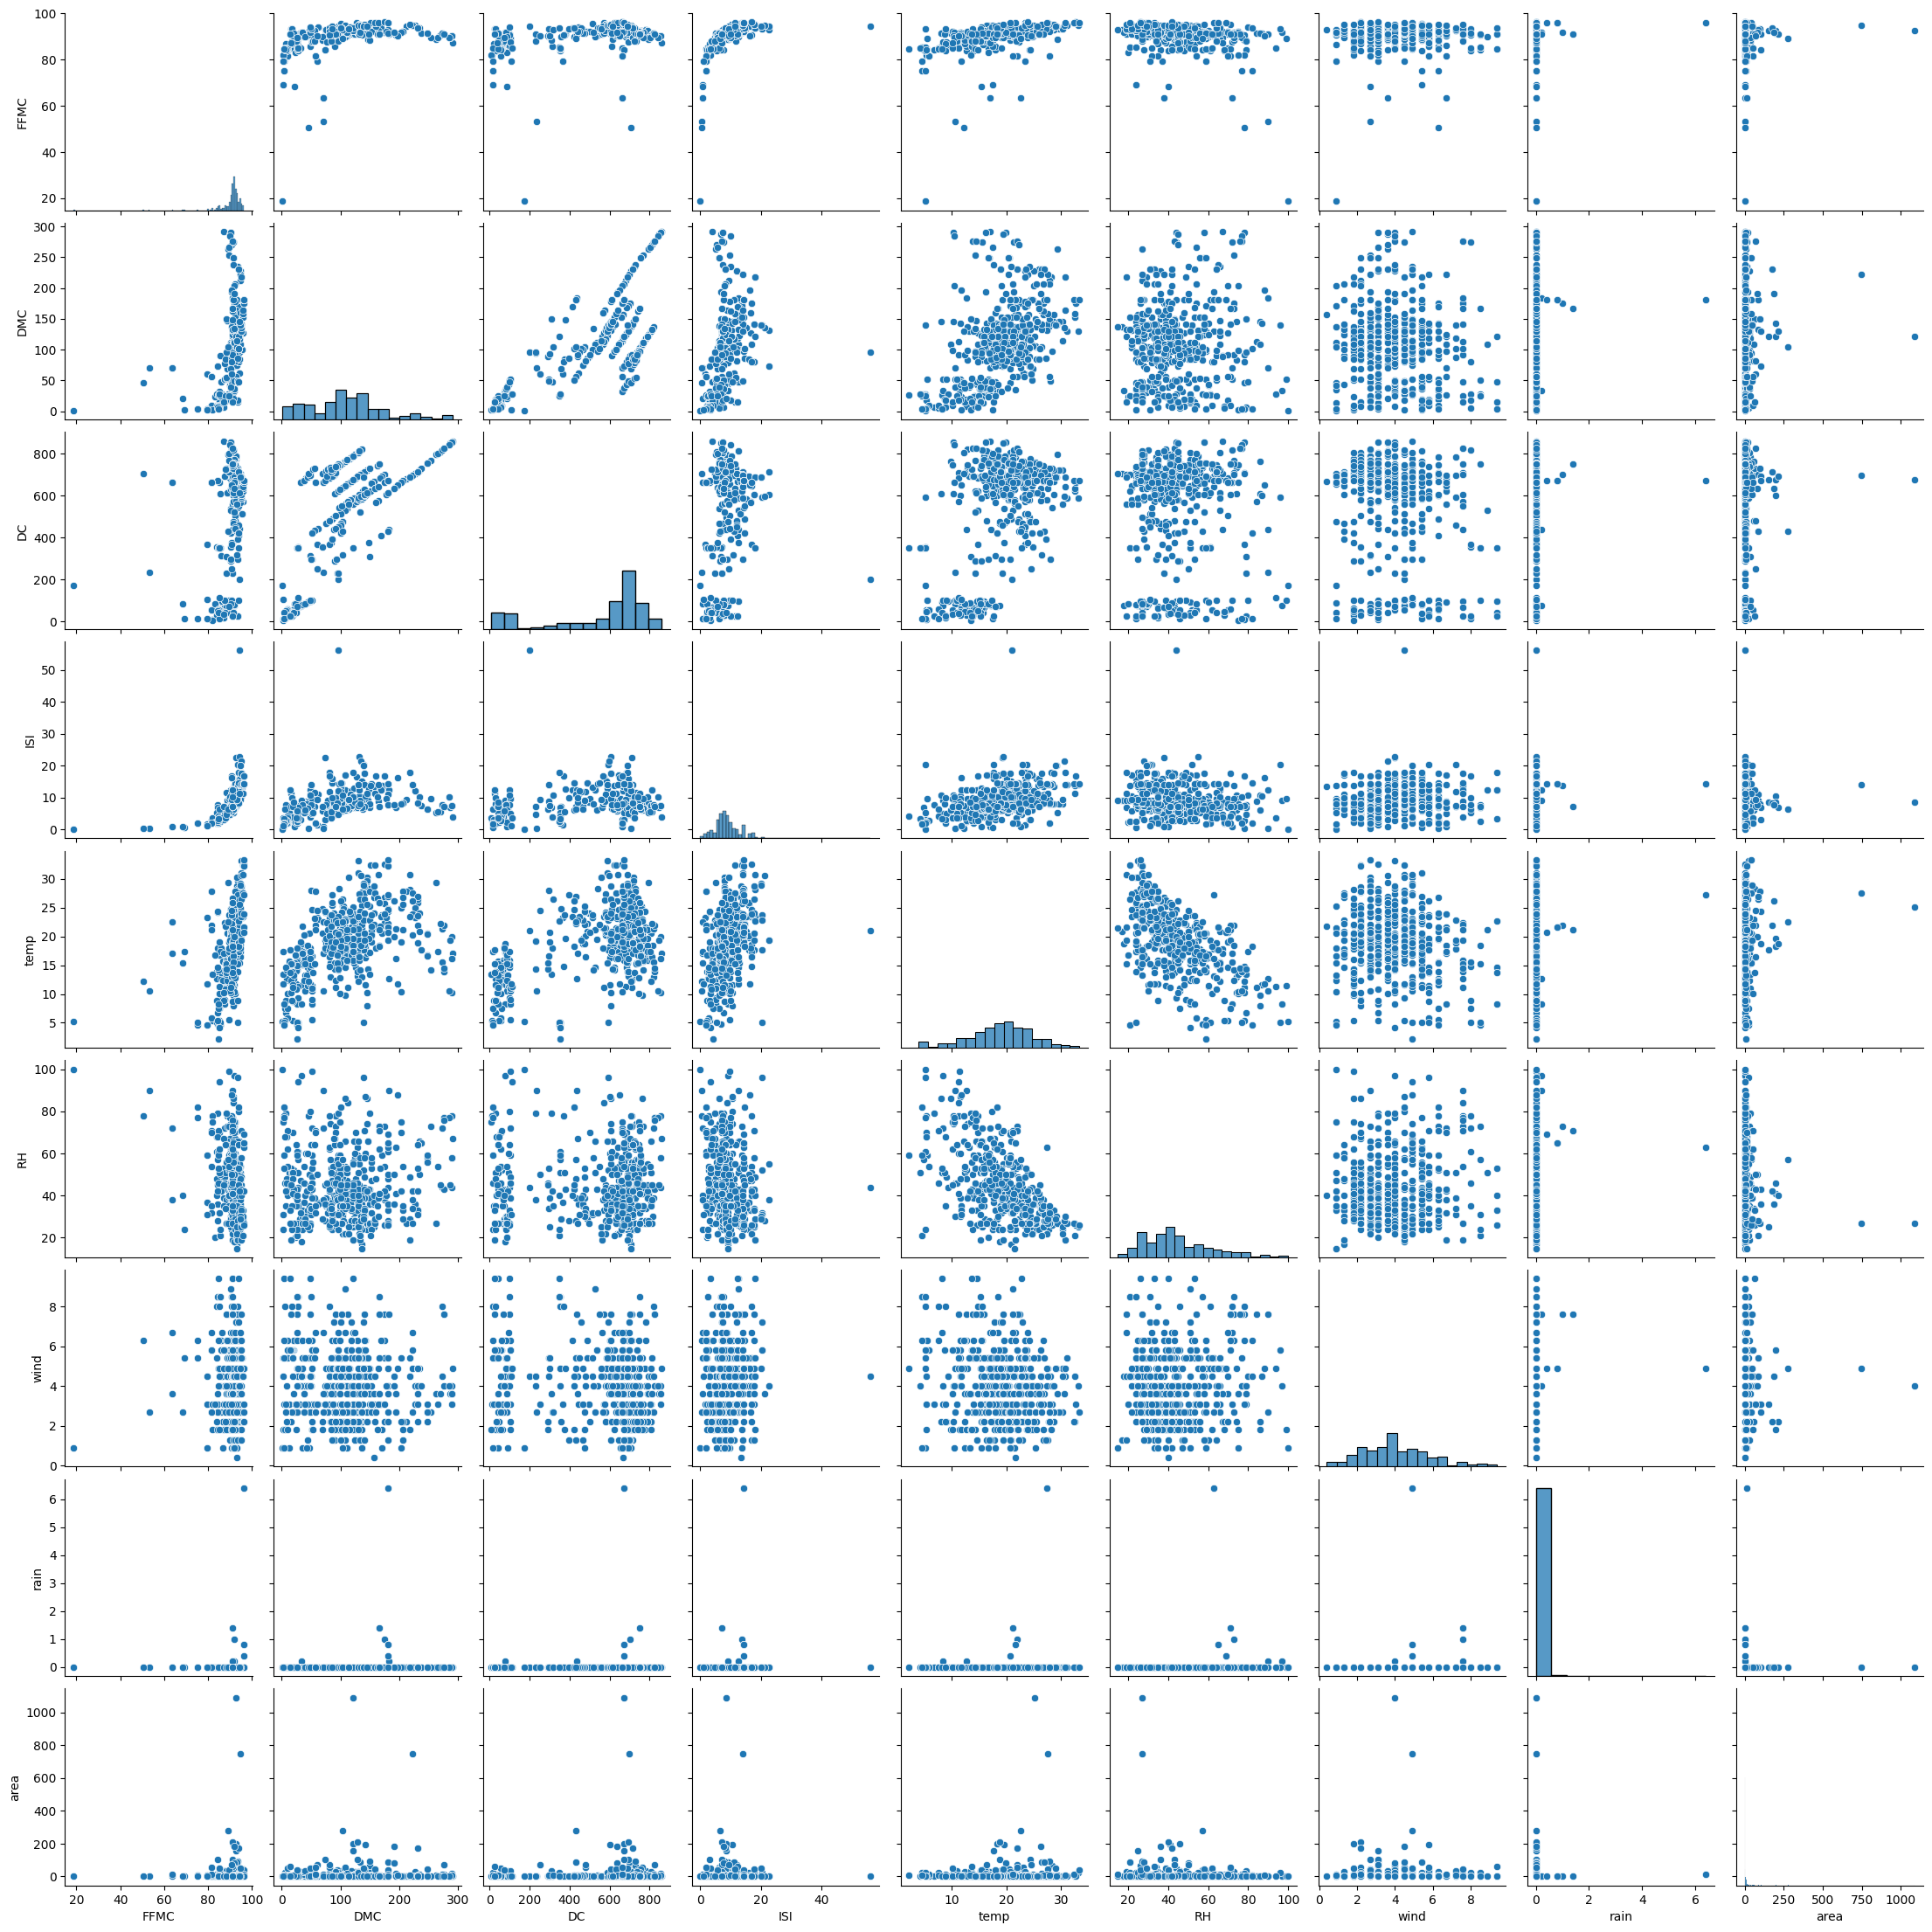

In [9]:
sns.pairplot(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
plt.show()

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title("Fire Occurrences per Month")
plt.show()

ValueError: Could not interpret input 'month'

<Figure size 1200x600 with 0 Axes>